In [1]:
import plotly.graph_objs as go
import chart_studio.plotly as py
import pandas as pd
import plotly
import chart_studio
import src.clean_dta as clean
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from matplotlib.offsetbox import AnchoredText
import matplotlib

import src.image_code as ic

import matplotlib.gridspec as gridspec
chart_studio.tools.set_credentials_file(username='rosiemin', api_key='PuHQaQ7Z4wsNDGSzVKKV')

In [2]:
train, product, site = clean.load_data('data/')

df = clean.clean_data(train, product, site)


In [3]:
df.shape

(35753, 20)

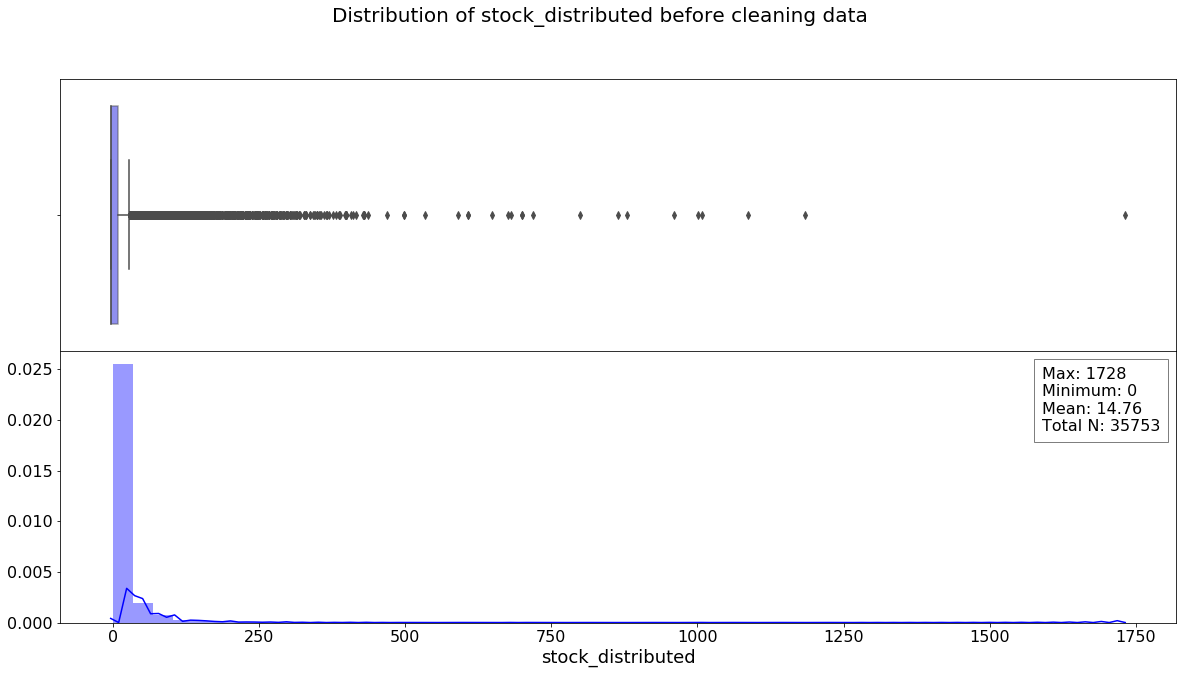

In [4]:
ic.hist_dat(df,'stock_distributed','blue','before', show = False, path = 'images/EDA_hist_before.png')

In [10]:
df_new, site = clean.remove_short_df(df)

In [11]:
df_new

,year,month,region,district,site_code,product_code,stock_initial,stock_received,stock_distributed,stock_adjustment,stock_end,average_monthly_consumption,stock_ordered,site_type,site_latitude,site_longitude,product_type,ID,calendar,site_product
0,2019,1,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,75,0,21,-54,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,2019 X 1 X C4001 X AS27134,2019-01-01,C4001 X AS27134
1,2019,2,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,0,0,0,0,18,100.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,2019 X 2 X C4001 X AS27134,2019-02-01,C4001 X AS27134
2,2019,3,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,0,100,0,0,100,7,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,2019 X 3 X C4001 X AS27134,2019-03-01,C4001 X AS27134
3,2019,4,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,100,0,2,0,98,1,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,2019 X 4 X C4001 X AS27134,2019-04-01,C4001 X AS27134
4,2019,5,INDENIE-DJUABLIN,ABENGOUROU,C4001,AS27134,98,0,31,0,67,11,0.0,Hospital,6.730937,-3.483863,Injectable Contraceptive,2019 X 5 X C4001 X AS27134,2019-05-01,C4001 X AS27134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27378,2016,11,AGNEBY-TIASSA-ME,TIASSALE,C1009,AS27133,99,0,75,0,24,59,75.0,Health Center,5.862030,-4.764830,Injectable Contraceptive,2016 X 11 X C1009 X AS27133,2016-11-01,C1009 X AS27133
27379,2016,12,AGNEBY-TIASSA-ME,TIASSALE,C1009,AS27133,24,0,0,0,24,42,0.0,Health Center,5.862030,-4.764830,Injectable Contraceptive,2016 X 12 X C1009 X AS27133,2016-12-01,C1009 X AS27133
27380,2016,6,AGNEBY-TIASSA-ME,TIASSALE,C1009,AS27133,0,0,0,0,0,0,6.0,Health Center,5.862030,-4.764830,Injectable Contraceptive,2016 X 6 X C1009 X AS27133,2016-06-01,C1009 X AS27133
27381,2016,9,AGNEBY-TIASSA-ME,TIASSALE,C1009,AS27133,0,150,51,0,99,17,0.0,Health Center,5.862030,-4.764830,Injectable Contraceptive,2016 X 9 X C1009 X AS27133,2016-09-01,C1009 X AS27133


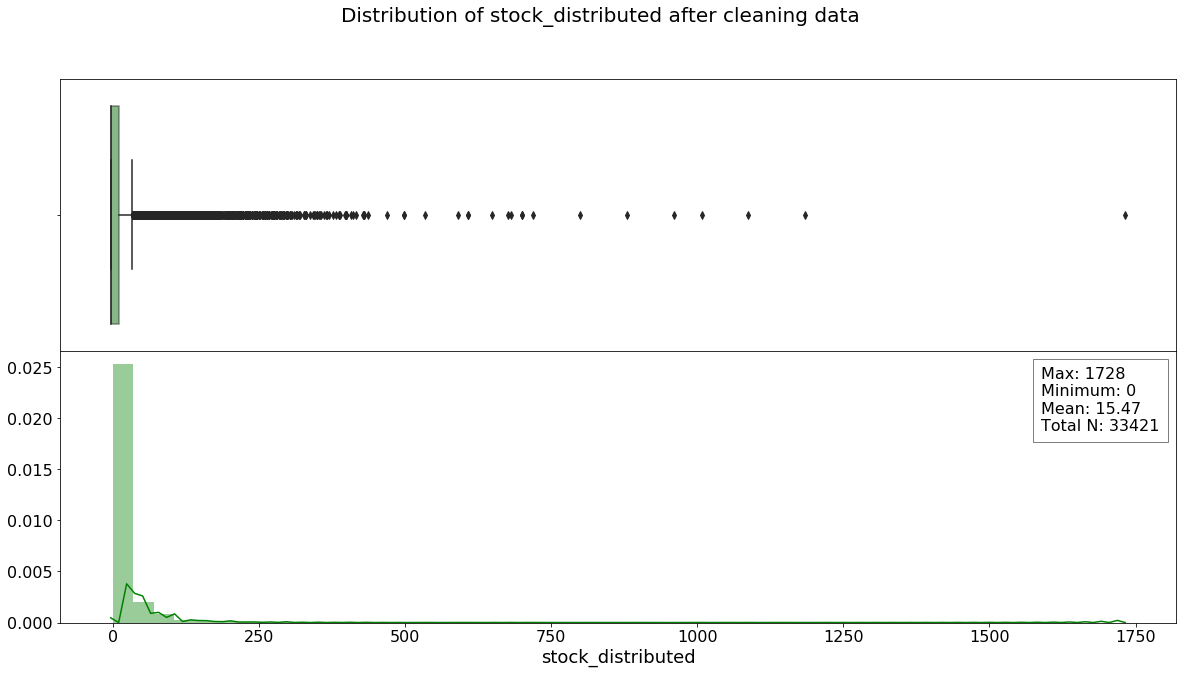

In [12]:
ic.hist_dat(df_new,'stock_distributed','green','after', show = False, path = 'images/EDA_hist_after.png')

In [13]:
df_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33421 entries, 0 to 27382
Data columns (total 20 columns):
 #   Column                       Non-Null Count  Dtype         
---  ------                       --------------  -----         
 0   year                         33421 non-null  int64         
 1   month                        33421 non-null  int64         
 2   region                       33421 non-null  object        
 3   district                     33421 non-null  object        
 4   site_code                    33421 non-null  object        
 5   product_code                 33421 non-null  object        
 6   stock_initial                33421 non-null  int64         
 7   stock_received               33421 non-null  int64         
 8   stock_distributed            33421 non-null  int64         
 9   stock_adjustment             33421 non-null  int64         
 10  stock_end                    33421 non-null  int64         
 11  average_monthly_consumption  33421 non-nu

''

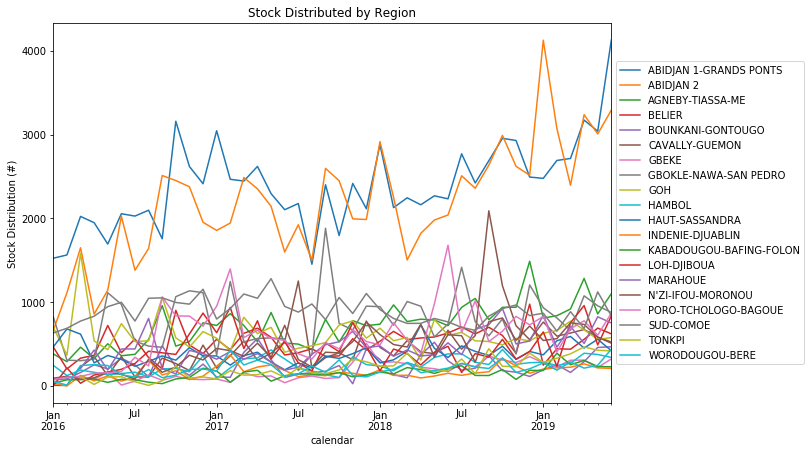

In [16]:
df_new.pivot_table(index = ['calendar'],
    columns = "region", values = "stock_distributed", aggfunc='sum').plot(figsize=(10,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel('Stock Distribution (#)')
plt.title('Stock Distributed by Region')
plt.savefig('images/stock_by_region.png')
;

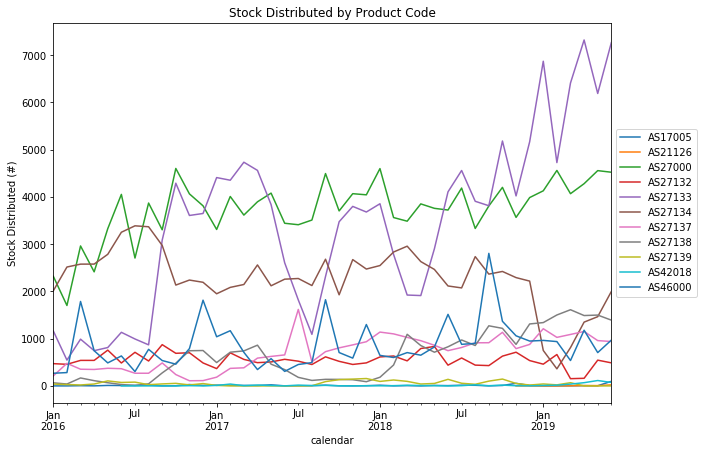

In [46]:
df_new.pivot_table(
    index = ['calendar'],
    columns = "product_code",
    values = "stock_distributed",
    aggfunc='sum').plot(figsize = (10,7))
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))
plt.ylabel("Stock Distributed (#)")
plt.title('Stock Distributed by Product Code')
plt.savefig('images/stock_by_product.png')

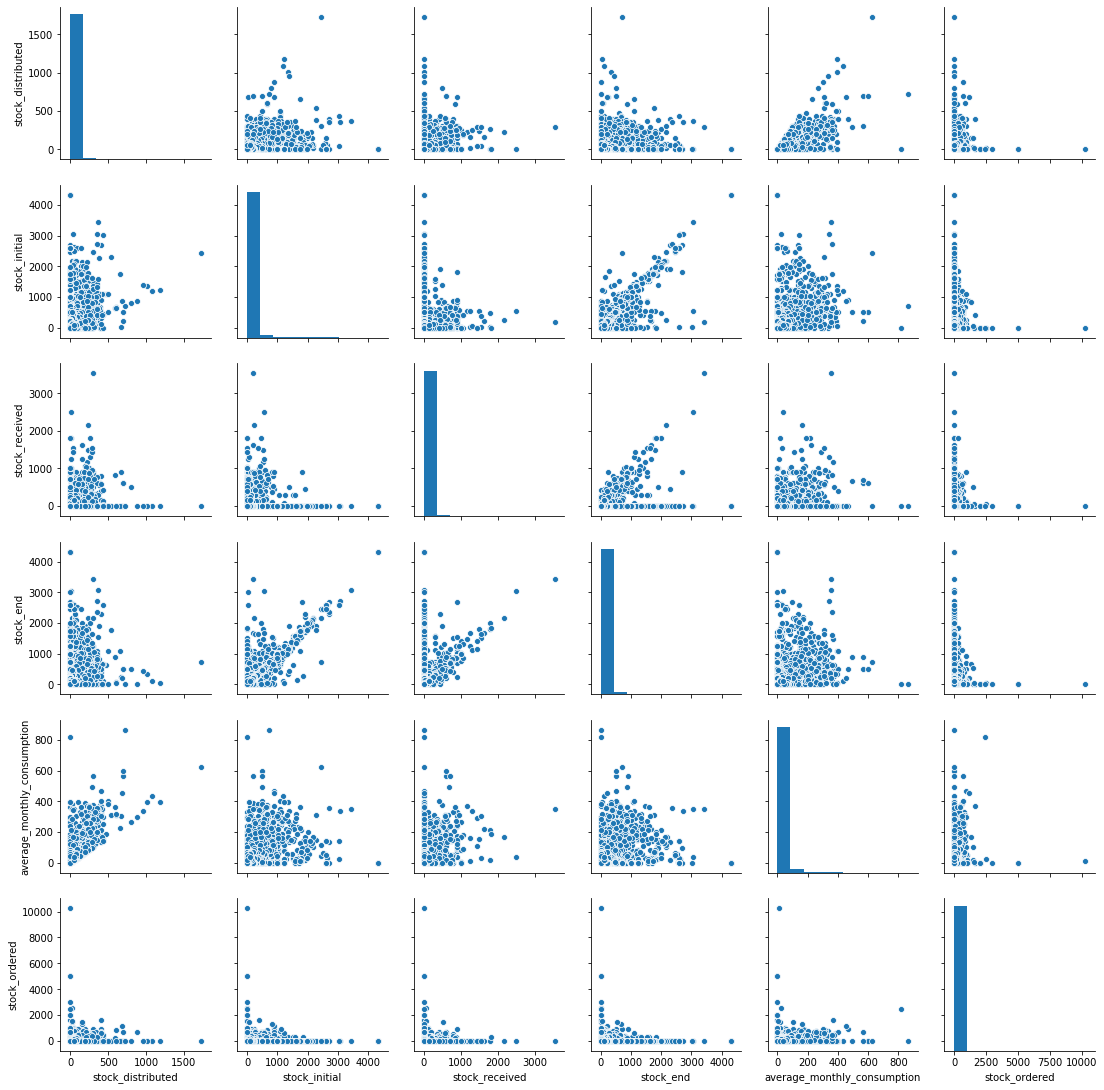

In [49]:
sns.pairplot(df_new[['stock_distributed', 'stock_initial', 'stock_received', 'stock_end', 'average_monthly_consumption', 'stock_ordered']])

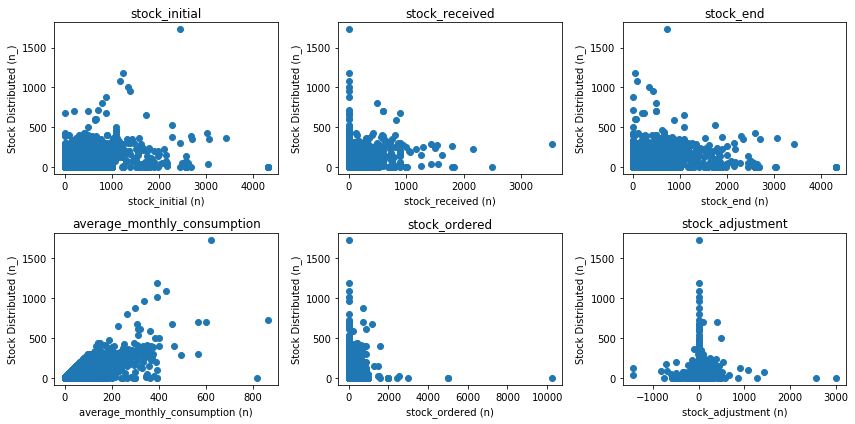

In [67]:
x_var = ['stock_initial', 'stock_received', 'stock_end', 'average_monthly_consumption', 'stock_ordered', 'stock_adjustment']
fig, axs = plt.subplots(2, 3, figsize=(12, 6))

# plt.title('Stock Distributed relationships with data')
for i, ax in enumerate(axs.flatten()):
    x = df_new[x_var[i]]
    y = df_new['stock_distributed']
    ax.scatter(x, y)
    ax.set_xlabel(f'{x_var[i]} (n)')
    ax.set_ylabel('Stock Distributed (n_)')
    ax.set_title(f'{x_var[i]}')
fig.tight_layout()

plt.savefig('images/stock_by_vars.png')

In [72]:
monthly = df_new.groupby('calendar').sum().stock_distributed.reset_index()

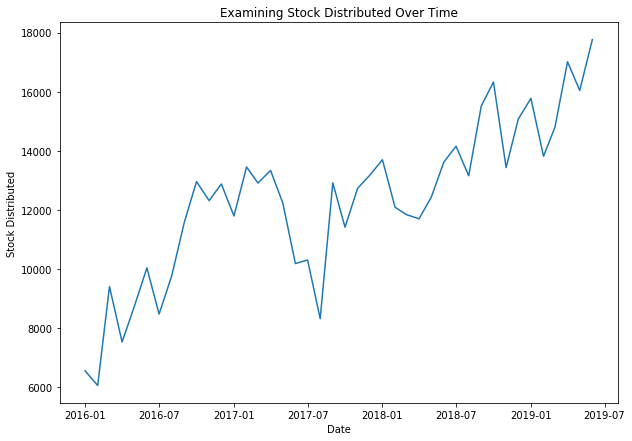

In [78]:
fig, ax = plt.subplots(figsize=(10,7))
ax.plot(monthly['calendar'], monthly['stock_distributed'])
ax.set_xlabel('Date')
ax.set_ylabel('Stock Distributed')
ax.set_title('Examining Stock Distributed Over Time')
plt.savefig('images/stock_vs_time.png');
